In [ ]:
# DBSCAN Clustering on Wholesale Customer Dataset

from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 
  
# metadata 
print(wholesale_customers.metadata) 
  
# variable information 
print(wholesale_customers.variables) 


{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

In [4]:
X_log = np.log1p(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Points labeled -1 (outliers)
unique_labels = np.unique(labels_dbscan)

# Ignoring -1 label for silhouette score calculation
mask = labels_dbscan != -1
if len(np.unique(labels_dbscan[mask])) > 1:
    sil_dbscan = silhouette_score(X_scaled[mask], labels_dbscan[mask])
else:
    sil_dbscan = -1  # Not valid if all in one cluster or all noise


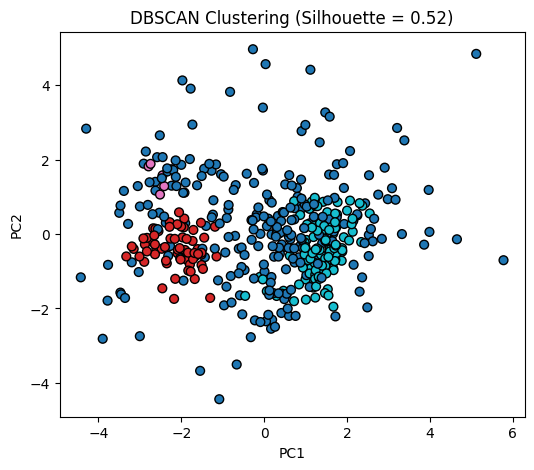

Silhouette Scores:
K-Means:       0.32
Hierarchical:  0.26
DBSCAN:        0.516


In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=labels_dbscan, cmap='tab10', s=40, edgecolor='k'
)
plt.title(f'DBSCAN Clustering (Silhouette = {sil_dbscan:.2f})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Compare all methods
print(f"Silhouette Scores:")
print(f"K-Means:       {0.32}")
print(f"Hierarchical:  {0.26}")
print(f"DBSCAN:        {sil_dbscan:.3f}")

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
sil_kmeans = silhouette_score(X_scaled, labels_kmeans)

hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hier = hier.fit_predict(X_scaled)
sil_hier = silhouette_score(X_scaled, labels_hier)


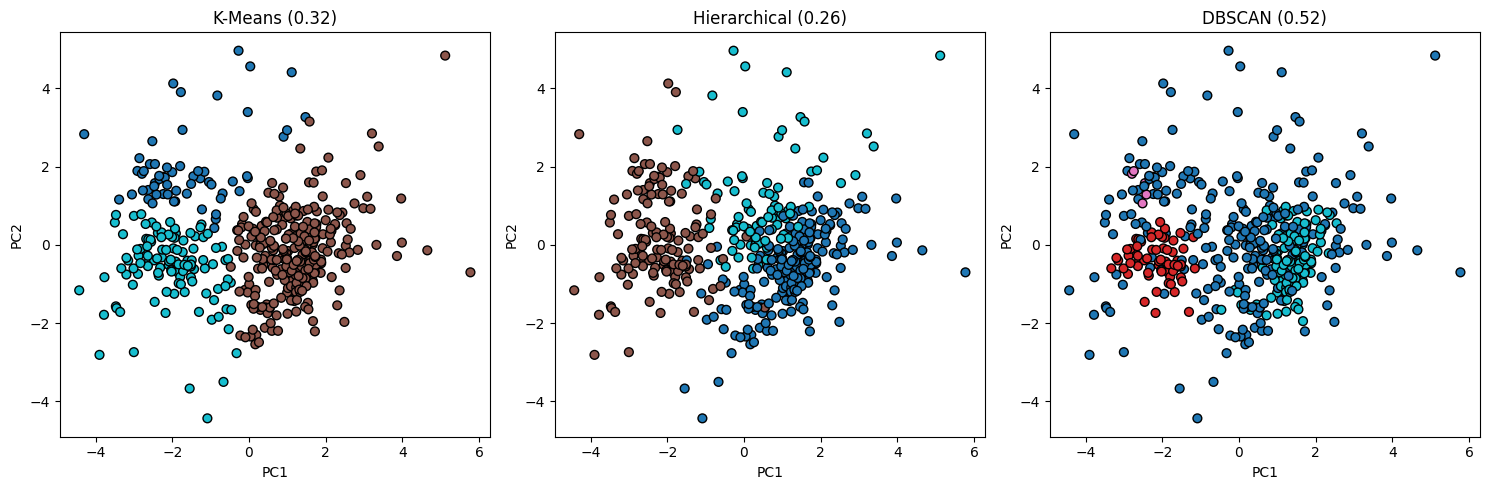

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, labels, title in zip(
    axes,
    [labels_kmeans, labels_hier, labels_dbscan],
    [f'K-Means ({sil_kmeans:.2f})', f'Hierarchical ({sil_hier:.2f})', f'DBSCAN ({sil_dbscan:.2f})']
):
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=40, edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

plt.tight_layout()
plt.show()
